In [3]:
import pandas as pd
import numpy as np
import seaborn as sns


In [4]:
data_red = pd.read_csv('winequality-red (1).csv',sep=";")

In [5]:
data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data_red.shape

(1599, 12)

In [7]:
data_white = pd.read_csv('winequality-white (1).csv',sep=";")

In [8]:
data_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [18]:
data_white.shape

(4898, 12)

In [9]:
pd.unique(data_white['quality'])

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [10]:
pd.unique(data_red['quality'])

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [11]:
data_red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
data_white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Text(0, 0.5, 'alcohol')

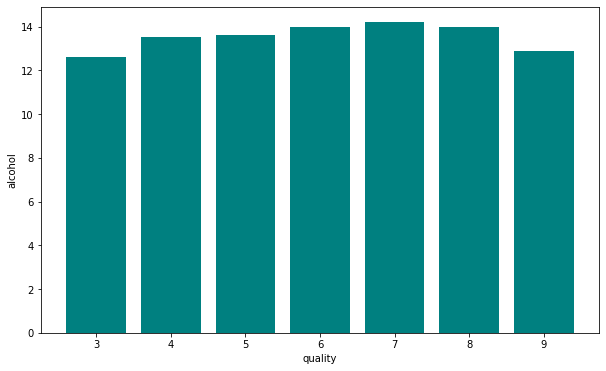

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=[10,6])
# plot bar graph
plt.bar(data_white['quality'],data_white['alcohol'],color='teal')
# label x-axis
plt.xlabel('quality')
#label y-axis
plt.ylabel('alcohol')

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

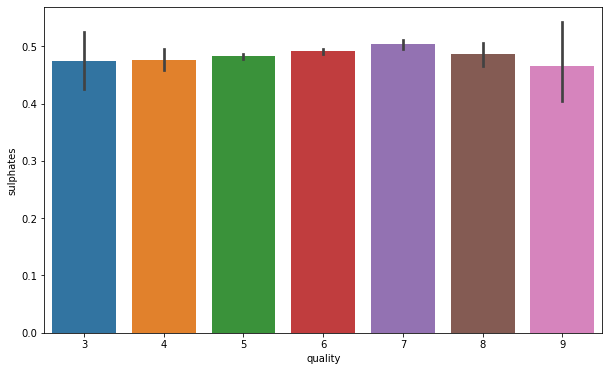

In [15]:
#Sulphates level goes higher with the quality of wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = data_white)

<AxesSubplot:>

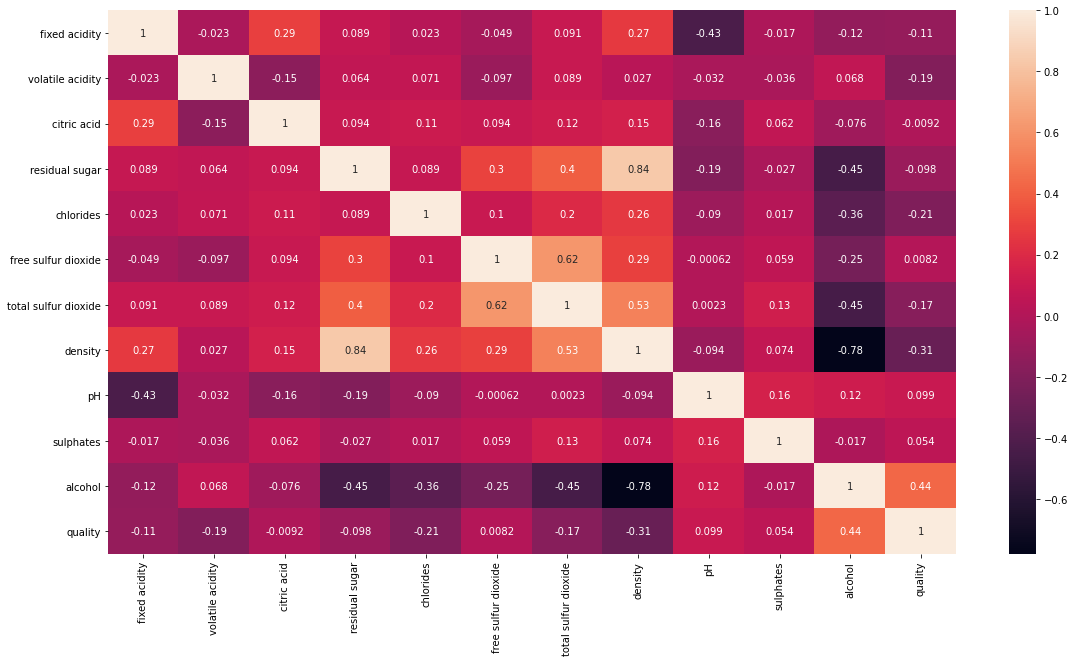

In [16]:
plt.figure(figsize=[19,10])
sns.heatmap(data_white.corr(),annot=True)

1.fixed acidity and citric acid. 2.free sulphur dioxide and total sulphor dioxide. 3.fixed acidity and density.

alcohol and quality.
so, from above points there is a clear inference that alcohol is the most important characteristic to determine the quality of wine.

In [19]:
# Create Classification version of target variable
data_white['goodquality'] = [1 if x >= 7 else 0 for x in data_white['quality']]
# Separate feature variables and target variable
X = data_white.drop(['quality','goodquality'], axis = 1)
y = data_white['goodquality']

In [21]:
data_white['goodquality'].value_counts()

0    3838
1    1060
Name: goodquality, dtype: int64

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='goodquality', ylabel='count'>

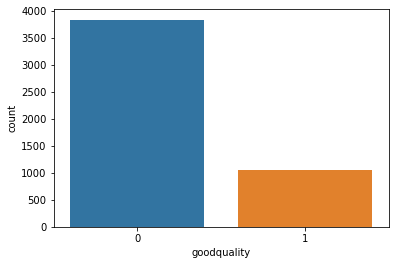

In [22]:
sns.countplot(data_white['goodquality'])

In [23]:
data_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [24]:
#preparing data for modelling
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

In [25]:
X

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -1.24692128e+00, -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         7.40028640e-01,  1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         4.75101984e-01, -4.36815783e-01, -3.36667007e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -1.31315295e+00, -2.61552731e-01, -9.05543789e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
         1.00495530e+00, -9.62604939e-01,  1.85757201e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
         4.75101984e-01, -1.48839409e+00,  1.04489089e+00]])

In [49]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [50]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3673, 11)
(3673,)
(1225, 11)
(1225,)


In [51]:
#DecisionTree Classifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

In [52]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       963
           1       0.58      0.57      0.58       262

    accuracy                           0.82      1225
   macro avg       0.73      0.73      0.73      1225
weighted avg       0.82      0.82      0.82      1225



In [53]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
#print(classification_report(y_test, y_pred2)

In [54]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92       963
           1       0.76      0.53      0.63       262

    accuracy                           0.86      1225
   macro avg       0.82      0.74      0.77      1225
weighted avg       0.86      0.86      0.85      1225



In [55]:
model2.score(X_test,y_test)

0.8636734693877551

In [56]:
#Boosting Algorithm
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(random_state=1)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
#print(classification_report(y_test, y_pred3))

In [57]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       963
           1       0.52      0.35      0.42       262

    accuracy                           0.79      1225
   macro avg       0.68      0.63      0.65      1225
weighted avg       0.77      0.79      0.78      1225



In [63]:
import pickle
pickle.dump(model2, open('model1.pkl','wb'))

model1 = pickle.load(open('model1.pkl','rb'))

In [64]:
print(model1.predict([[7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4]]))

[0]


In [65]:
model1.predict(X_train)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
y_train

1819    0
1021    1
4681    0
4018    0
1852    1
       ..
4859    0
3264    0
1653    0
2607    0
2732    0
Name: goodquality, Length: 3673, dtype: int64

In [67]:
model1.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
y_test


2762    0
42      0
1419    1
3664    1
2125    0
       ..
36      0
3237    1
4324    0
3411    0
2531    0
Name: goodquality, Length: 1225, dtype: int64